In [1]:
library(ArchR)
library("unixtools")
set.tempdir("/mnt/data1/william/tmp")
addArchRThreads(threads = 32)
addArchRGenome("hg38")
library(pheatmap)
`%notin%` = Negate(`%in%`)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
working_dir <- paste0(getwd(), "/harmonized_ArchRproject")
proj3 <- loadArchRProject(path = working_dir,
                          force = FALSE,
                          showLogo = FALSE)

Successfully loaded ArchRProject!



In [3]:
metadata <- getCellColData(proj3)
dim(metadata)

[1] 569502     15

In [4]:
colnames(metadata)

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "DoubletScore"      "DoubletEnrichment" "BlacklistRatio"

In [5]:
metadata$ATAC_barcode <- sub(".*#", "", rownames(metadata))

In [6]:
metadata$ATAC_barcode %>% head()

[1] "ENCSR803QTN:TGGGTTAAGACAACGC" "ENCSR803QTN:ATCCTGCAGGTTACAA"
[3] "ENCSR803QTN:AACTGGTCATACAACC" "ENCSR803QTN:GGAATCTAGGTCGGTA"
[5] "ENCSR803QTN:GGGAACAAGATCTAAG" "ENCSR803QTN:CAACGGCTCGAGCGCT"

### Transfer the annotation from SnapATAC2

In [7]:
SnapATAC_metadata <- read.csv("../../metadata_plots/01_ATAC_cell_level_metadata.csv")

In [8]:
intersecting_barcodes <- intersect(metadata$ATAC_barcode, SnapATAC_metadata$ATAC_barcode)
length(intersecting_barcodes)

[1] 569502

In [9]:
SnapATAC_metadata %>% head()

,X,ATAC_barcode,sample_id,leiden,donor_id,study,age_status,age,sex,region,⋯,file,nfrag,tsse,cell_type,tech_plus_study,age_group,decade,final_cell_type,cell_or_nuclei,disease
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,ENCSR556UHL:AAAGGATTCATTCTCA,ENCSR556UHL:AAAGGATTCATTCTCA,ENCSR556UHL,0,ENCODE v4 (Snyder):ENCSR556UHL,ENCODE v4 (Snyder),postnatal,61,male,LV,⋯,ENCSR556UHL_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND
2,ENCSR556UHL:GTAATCGCATTACCTT,ENCSR556UHL:GTAATCGCATTACCTT,ENCSR556UHL,0,ENCODE v4 (Snyder):ENCSR556UHL,ENCODE v4 (Snyder),postnatal,61,male,LV,⋯,ENCSR556UHL_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND
3,ENCSR556UHL:TACGGATAGGAGACTC,ENCSR556UHL:TACGGATAGGAGACTC,ENCSR556UHL,0,ENCODE v4 (Snyder):ENCSR556UHL,ENCODE v4 (Snyder),postnatal,61,male,LV,⋯,ENCSR556UHL_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND
4,ENCSR556UHL:TCAAGACTCACGTGTA,ENCSR556UHL:TCAAGACTCACGTGTA,ENCSR556UHL,0,ENCODE v4 (Snyder):ENCSR556UHL,ENCODE v4 (Snyder),postnatal,61,male,LV,⋯,ENCSR556UHL_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND
5,ENCSR913OAS:AAACTCGAGCGAATAT,ENCSR913OAS:AAACTCGAGCGAATAT,ENCSR913OAS,0,ENCODE v4 (Snyder):ENCSR913OAS,ENCODE v4 (Snyder),postnatal,66,male,LV,⋯,ENCSR913OAS_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND
6,ENCSR913OAS:AAACTCGGTGGACCAA,ENCSR913OAS:AAACTCGGTGGACCAA,ENCSR913OAS,0,ENCODE v4 (Snyder):ENCSR913OAS,ENCODE v4 (Snyder),postnatal,66,male,LV,⋯,ENCSR913OAS_pre_trimmed_tsse_v_nfrags.png,2000,5,Adipocyte,Multiome-v1_ENCODE v4 (Snyder),old,6,Adipocyte,Nuclei,ND


In [10]:
filtered_SnapATAC_metadata <- SnapATAC_metadata[, c("final_cell_type", "ATAC_barcode", "sample_id", 
                                                    "donor_id", "study", "age_status", "disease", "cell_or_nuclei",
                                                   "tech_plus_study", "sex", "age")]

In [11]:
updated_metadata <- metadata %>% merge(filtered_SnapATAC_metadata, on = c("final_cell_type", "ATAC_barcode"),
                                        all.x = TRUE,  sort = FALSE)

updated_metadata <- updated_metadata[match(metadata$ATAC_barcode, updated_metadata$ATAC_barcode), ]

In [12]:
updated_metadata$cell_type <- updated_metadata$final_cell_type

In [13]:
proj3$cell_type <- updated_metadata$cell_type
proj3$ATAC_barcode <-  updated_metadata$ATAC_barcode
proj3$sample_id <-  updated_metadata$sample_id
proj3$donor_id <-  updated_metadata$donor_id
proj3$study <-  updated_metadata$study
proj3$age_status <-  updated_metadata$age_status
proj3$disease <-  updated_metadata$disease
proj3$cell_or_nuclei <- updated_metadata$cell_or_nuclei
proj3$tech_plus_study <- updated_metadata$tech_plus_study
proj3$sex <- updated_metadata$sex
proj3$age <- updated_metadata$sex

In [14]:
updated_proj_metadata <- getCellColData(proj3)
updated_proj_metadata_df <- as.data.frame(updated_proj_metadata)
write.csv(updated_proj_metadata_df, "proj3_metadata.csv", row.names = TRUE)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5469718bd99ea-Date-2025-02-10_Time-19-18-55.904179.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5469718bd99ea-Date-2025-02-10_Time-19-18-55.904179.log



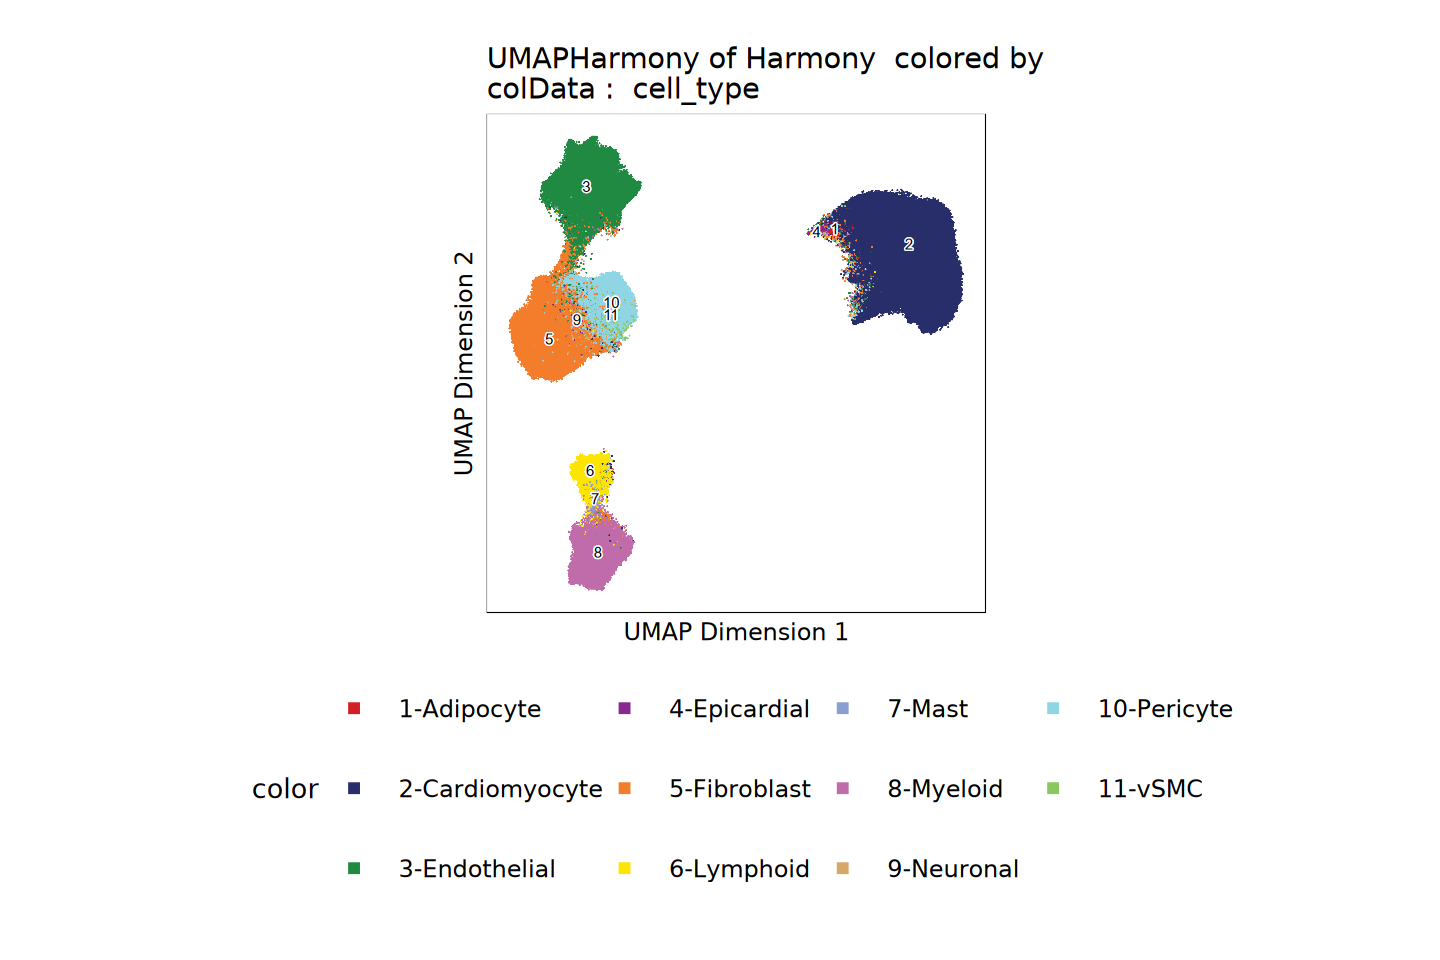

In [15]:
options(repr.plot.width = 12, repr.plot.height = 8)
p1 <- plotEmbedding(ArchRProj = proj3, colorBy = "cellColData", name = "cell_type", 
                    embedding = "UMAPHarmony", baseSize=14)

# Modify legend size and font size
p1 <- p1 + theme(
  legend.key.size = unit(1.5, "cm"),  # Increase the size of the legend keys
  legend.text = element_text(size = 14),  # Increase the font size of the legend labels
  legend.title = element_text(size = 16)  # Increase the font size of the legend title
)

p1

ggsave(p1, file = "UMAP_by_cell_type.pdf", width = 12, height = 8)

### Produce plot of marker genes

In [16]:
markerGenes  <- c(
    "PPARG",  # Adipocyte
    "TTN", # CM
    "VWF", # Endothelial
    "WT1", # Epicardial
    "DCN", # Fibroblast
    "SKAP1", # Lymphoid
    "KIT", # Mast
    "CD163", # Myeloid
    "NRXN1", # Neuronal
    "PDGFRB", # Pericyte
    "MYH11" # vSMC 
  )

In [17]:
p <- plotBrowserTrack(
    ArchRProj = proj3, 
    groupBy = "cell_type", 
    geneSymbol = markerGenes, 
    upstream = 5000,
    downstream = 5000,
    baseSize = 8, # font size 
    facetbaseSize = 7 # font size for the gray cell type labels
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-54697c974952-Date-2025-02-10_Time-19-19-26.248852.log
If there is an issue, please report to github with logFile!

2025-02-10 19:19:26.317897 : Validating Region, 0.001 mins elapsed.



GRanges object with 11 ranges and 2 metadata columns:
       seqnames              ranges strand |     gene_id      symbol
          <Rle>           <IRanges>  <Rle> | <character> <character>
   [1]     chr3   12287368-12434356      + |        5468       PPARG
   [2]     chr2 178525989-178830802      - |        7273         TTN
   [3]    chr12     5948874-6124770      - |        7450         VWF
   [4]    chr11   32387775-32435630      - |        7490         WT1
   [5]    chr12   91140484-91183123      - |        1634         DCN
   [6]    chr17   48133440-48430275      - |        8631       SKAP1
   [7]     chr4   54657918-54740715      + |        3815         KIT
   [8]    chr12     7470813-7503893      - |        9332       CD163
   [9]     chr2   49918505-51082864      - |        9378       NRXN1
  [10]     chr5 150113837-150155872      - |        5159      PDGFRB
  [11]    chr16   15703135-15857033      - |        4629       MYH11
  -------
  seqinfo: 24 sequences from hg38 genom

2025-02-10 19:19:26.454812 : Adding Bulk Tracks (1 of 11), 0.003 mins elapsed.

2025-02-10 19:19:48.834865 : Adding Gene Tracks (1 of 11), 0.376 mins elapsed.

2025-02-10 19:19:49.297206 : Plotting, 0.384 mins elapsed.

2025-02-10 19:19:50.090543 : Adding Bulk Tracks (2 of 11), 0.397 mins elapsed.

2025-02-10 19:20:05.958679 : Adding Gene Tracks (2 of 11), 0.662 mins elapsed.

2025-02-10 19:20:06.237767 : Plotting, 0.666 mins elapsed.

2025-02-10 19:20:07.087622 : Adding Bulk Tracks (3 of 11), 0.681 mins elapsed.

2025-02-10 19:20:23.5886 : Adding Gene Tracks (3 of 11), 0.956 mins elapsed.

2025-02-10 19:20:23.877042 : Plotting, 0.96 mins elapsed.

2025-02-10 19:20:24.713208 : Adding Bulk Tracks (4 of 11), 0.974 mins elapsed.

2025-02-10 19:20:41.532229 : Adding Gene Tracks (4 of 11), 1.255 mins elapsed.

2025-02-10 19:20:41.808831 : Plotting, 1.259 mins elapsed.

2025-02-10 19:20:42.683966 : Adding Bulk Tracks (5 of 11), 1.274 mins elapsed.

2025-02-10 19:20:59.260332 : Adding Gene Tr

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)

for (gene in markerGenes) {
    grid::grid.newpage()
    grid::grid.draw(p$gene)
}

In [20]:
plotPDF(plotList = p, 
    name = "Plot-Tracks-Marker-Genes.pdf", 
    ArchRProj = proj3, 
    addDOC = FALSE, 
        width = 5, height = 5)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


### Save the ArchR project with the cell type labels

In [21]:
# save the ArchR project in its current directory
saveArchRProject(
  ArchRProj = proj3,           
  outputDirectory = getwd(),   
  overwrite = TRUE             
)

Copying ArchRProject to new outputDirectory : /mnt/data1/william/human_heart_project/Final_manuscript_analysis/ATAC/aggregated_analysis/ArchR_analysis/run_ArchR

Copying Arrow Files...

Copying Arrow Files (1 of 130)

Copying Arrow Files (2 of 130)

Copying Arrow Files (3 of 130)

Copying Arrow Files (4 of 130)

Copying Arrow Files (5 of 130)

Copying Arrow Files (6 of 130)

Copying Arrow Files (7 of 130)

Copying Arrow Files (8 of 130)

Copying Arrow Files (9 of 130)

Copying Arrow Files (10 of 130)

Copying Arrow Files (11 of 130)

Copying Arrow Files (12 of 130)

Copying Arrow Files (13 of 130)

Copying Arrow Files (14 of 130)

Copying Arrow Files (15 of 130)

Copying Arrow Files (16 of 130)

Copying Arrow Files (17 of 130)

Copying Arrow Files (18 of 130)

Copying Arrow Files (19 of 130)

Copying Arrow Files (20 of 130)

Copying Arrow Files (21 of 130)

Copying Arrow Files (22 of 130)

Copying Arrow Files (23 of 130)

Copying Arrow Files (24 of 130)

Copying Arrow Files (25 of 130)

class: ArchRProject 
outputDirectory: /mnt/data1/william/human_heart_project/Final_manuscript_analysis/ATAC/aggregated_analysis/ArchR_analysis/run_ArchR 
samples(130): ENCSR051ECW HCAHeartST10773166_HCAHeartST10781063 ...
  10X_ATAC_CK174 10X_ATAC_CK349
sampleColData names(1): ArrowFiles
cellColData names(26): Sample TSSEnrichment ... sex age
numberOfCells(1): 569502
medianTSS(1): 10.206
medianFrags(1): 5829